In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Make Data

<IPython.core.display.Javascript object>


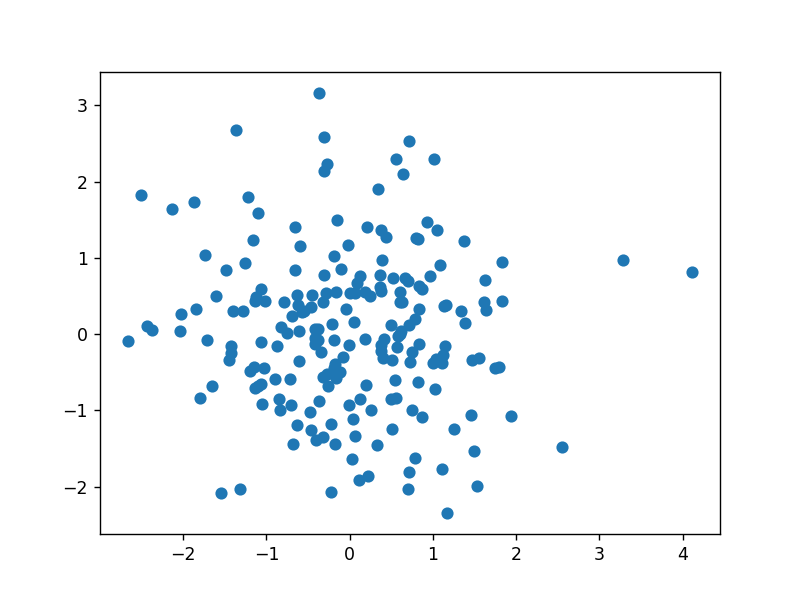

In [2]:
X, y = make_blobs(n_samples=200, centers=[[0,0]], n_features=2, random_state=2, shuffle=True)

plt.figure()
plt.scatter(X.T[0], X.T[1])

# Mean Shift Algorithm
Mean shift is an iterative algorithm. It starts with an initial estimate $x \in \mathbb{R}^n$ then looks for the points inside the bandwidth $\lambda$ (this defines the neighborhood $N$). Then we compute a weighted average of the locations of the points in the neighborhood

$$m(x) = \frac{\sum_{x^{(i)}\in N(x)} K(x^{(i)} - x;\lambda) x^{(i)} }{\sum_{x^{(i)}\in N(x)} K(x^{(i)} - x;\lambda)}$$

we note that $m\in\mathbb{R}^n$ and $K$ is the Kernel. The two most commonly-used kernels are the flat and Gaussian kernels.

### Flat Kernel
$$K(x;\lambda) = \begin{cases}
                        1, & \text{ if } \Vert x \Vert \le \lambda\\
                        0, & \text{ if } \Vert x \Vert \ge \lambda\end{cases}$$
Mean shift won't work if the initial $x$ is too far from the training data and the specified bandwidth is too large.

### Gaussian Kernel
$$K(x;\lambda) = \text{exp}\left[ -\frac{x^2}{2\lambda^2} \right]$$

Mean shift with a Gaussian kernel simply means that $m$ is the center of a Gaussian. It keeps getting updated as it is being iterated. Unlike the flat kernel version, mean shift with the Gaussian kernel won't miss the training data even if the initial $x$ is too far from the training data.

# Flat Kernel

In [15]:
# Select bandwidth
λ = 2.0
max_iter = 200

# Initial centroids
m = np.array([-3.5, 3.5])
ls_centroids_flat = [m]

def Kernel(x, λ, kernel_type):
    if kernel_type=='flat':
        if np.linalg.norm(x) <= λ:
            return 1

        else:
            return 0
        
    if kernel_type=='gaussian':
        return np.exp(-np.linalg.norm(x)/(2*λ**2))
    
for iteration in range(max_iter):
    m = np.array([np.sum(i) for i in np.array([Kernel(X_i - m, λ, kernel_type='flat')*X_i for X_i in X]).T]) / np.sum([Kernel(X_i - m, λ, kernel_type='flat') for X_i in X])
    ls_centroids_flat.append(m)

# Gaussian Kernel

In [16]:
# Select bandwidth
λ = 1
max_iter = 200

# Initial centroids
m = np.array([-3.5, 3.5])
ls_centroids_gaussian = [m]

def Kernel(x, λ, kernel_type):
    if kernel_type=='flat':
        if np.linalg.norm(x) <= λ:
            return 1

        else:
            return 0
        
    if kernel_type=='gaussian':
        return np.exp(-np.linalg.norm(x)/(2*λ**2))
    
for iteration in range(max_iter):
    m = np.array([np.sum(i) for i in np.array([Kernel(X_i - m, λ, kernel_type='gaussian')*X_i for X_i in X]).T]) / np.sum([Kernel(X_i - m, λ, kernel_type='gaussian') for X_i in X])
    ls_centroids_gaussian.append(m)

# Plot

<IPython.core.display.Javascript object>


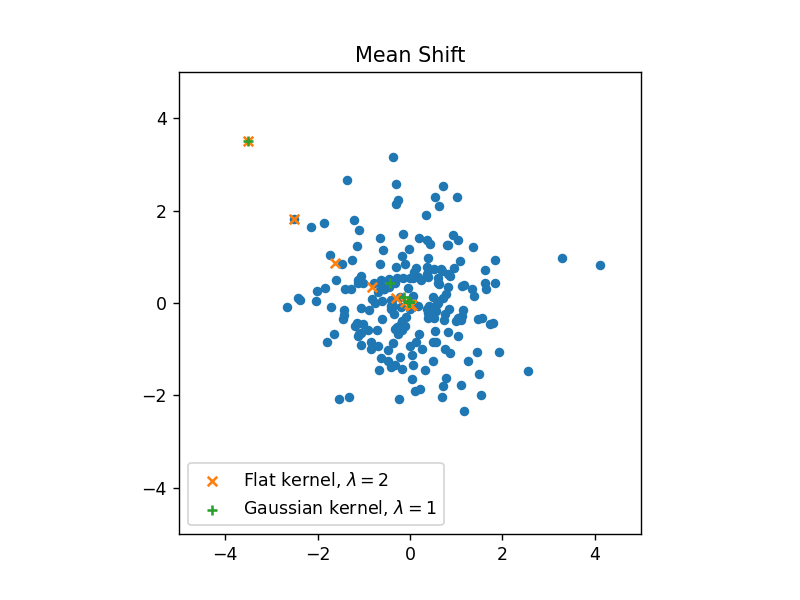

In [25]:
plt.figure()
plt.scatter(X.T[0], X.T[1], s=20)
plt.scatter(np.array(ls_centroids_flat).T[0], np.array(ls_centroids_flat).T[1], label=r"Flat kernel, $\lambda=2$", marker='x', s=30)
plt.scatter(np.array(ls_centroids_gaussian).T[0], np.array(ls_centroids_gaussian).T[1], label=r"Gaussian kernel, $\lambda=1$", marker='+', s=30)
plt.title("Mean Shift")
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.legend(loc=3)
plt.gca().set_aspect('equal', adjustable='box')